## Plots

In [94]:
import csv
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [105]:
gender_votes_data="data/gender_votes.csv"
education_data="data/education_summary.csv"
gender_votes_df=pd.read_csv(gender_votes_data)
education_df=pd.read_csv(education_data, engine='python')
gender_prov=gender_votes_df.groupby('Province')
total_male=gender_prov['Total_x'].sum()
total_female=gender_prov['Total_y'].sum()
gender_votes_df
sex_votes=pd.DataFrame({'Total Male':total_male,
                        'Total Female':total_female,
                             }
                            )
gender_votes_df
# Merge two dataframes using an inner join
merge_education = pd.merge(gender_votes_df, education_df , on="FED ID")
merge_education

,Prov/Terr,FED ID,Federal Electoral Districts_x,Total_x,Total Income_x,Total_y,Total Income_y,Province,Federal Electoral Districts_y,Population,...,Secondary School Diploma,Non-university certificate or diploma,University level or above,Unnamed: 6,FED ID.1,Federal Electoral Districts.1,No Certificate.1,Secondary School Diploma.1,Non-university certificate or diploma.1,University level or above.1
0,10,10001.0,Avalon,35410,2.129874e+09,36620,1295940000,Newfoundland and Labrador,Avalon,81540,...,203320.0,234910.0,116555.0,702625,10001,Avalon,21%,29%,33%,17%
1,10,10002.0,Bonavista--Burin--Trinity,32200,1.564974e+09,32720,888810000,Newfoundland and Labrador,Bonavista--Burin--Trinity,76704,...,179555.0,165055.0,48270.0,604415,10002,Bonavista--Burin--Trinity,35%,30%,27%,8%
2,10,10003.0,Coast of Bays--Central--Notre Dame,31830,1.506208e+09,33290,951860000,Newfoundland and Labrador,Coast of Bays--Central--Notre Dame,78092,...,195165.0,163180.0,66185.0,645610,10003,Coast of Bays--Central--Notre Dame,34%,30%,25%,10%
3,10,10004.0,Labrador,10510,7.550630e+08,10330,414185000,Newfoundland and Labrador,Labrador,26728,...,57495.0,67635.0,28960.0,219140,10004,Labrador,30%,26%,31%,13%
4,10,10005.0,Long Range Mountains,37670,1.729013e+09,39580,1185410000,Newfoundland and Labrador,Long Range Mountains,87592,...,213065.0,194010.0,94600.0,724990,10005,Long Range Mountains,31%,29%,27%,13%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,59,59041.0,Victoria,45130,2.806408e+09,51740,2463542000,British Columba,Victoria,110942,...,232690.0,186965.0,231950.0,861670,59041,Vimy,24%,27%,22%,27%
334,59,59042.0,West Vancouver--Sunshine Coast--Sea to Sky Cou...,47470,3.874496e+09,51380,2611750000,British Columba,West Vancouver--Sunshine Coast--Sea to Sky Cou...,112875,...,259540.0,161090.0,672390.0,1191535,59042,Willowdale,8%,22%,14%,56%
335,60,60001.0,Yukon,14260,8.411790e+08,14450,729651000,Yukon,Yukon,33897,...,NaN,NaN,NaN,0,60001,NaN,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!
336,61,61001.0,Northwest Territories,16310,1.065921e+09,15570,824421000,Northwest Territories,Northwest Territories,41462,...,169075.0,168570.0,517360.0,943820,61001,Notre-Dame-de-Gr�ce--Westmount,9%,18%,18%,55%


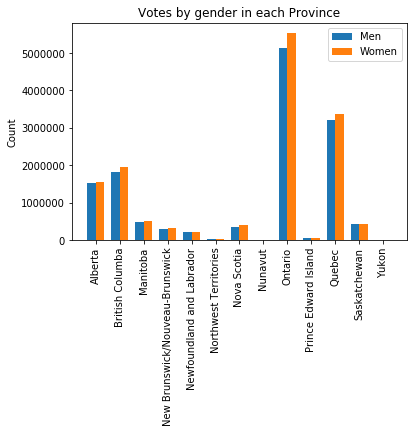

<Figure size 288x288 with 0 Axes>

In [96]:
province = sex_votes.index.tolist()
x = np.arange(len(province))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, total_male, width, label='Men')
rects2 = ax.bar(x + width/2, total_female, width, label='Women')

ax.set_ylabel('Count')
ax.set_title('Votes by gender in each Province')
ax.set_xticks(x)
ax.set_xticklabels(province)
ax.legend()

plt.xticks(rotation=90)


plt.figure(figsize=(4,4))

plt.show()

In [98]:
party_data=gender_votes_df.groupby('Party Won')
male_income=(party_data['Total Income_x'].sum())/(party_data['Total_x'].sum())
female_income=(party_data['Total Income_y'].sum())/(party_data['Total_y'].sum())
party_won=party_data['Party Won_count'].count()
income_party=pd.DataFrame({'Avg Male Income':male_income,
                        'Avg Female Income':female_income,
                        'Districts Won by each party':party_won
                             }
                            )
income_party


,Avg Male Income,Avg Female Income,Districts Won by each party
Party Won,,,
Bloc Québécois,50582.575236,34230.622952,10
Conservative,60078.966823,39137.318535,99
Green Party,62166.816568,46104.644290,1
Liberal,56187.838122,39249.607199,184
NDP,50012.805079,35239.894899,44


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

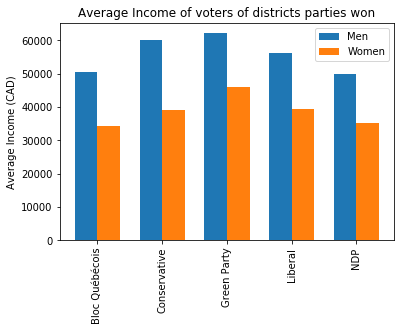

In [100]:
party_name = income_party.index.tolist()
x = np.arange(len(party_name))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_income, width, label='Men')
rects2 = ax.bar(x + width/2, female_income, width, label='Women')

ax.set_ylabel('Average Income (CAD)')
ax.set_title('Average Income of voters of districts parties won')
ax.set_xticks(x)
ax.set_xticklabels(party_name)
ax.legend()

plt.xticks(rotation=90)



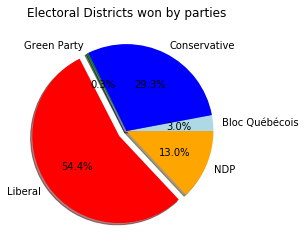

In [101]:
party_pyplot=(gender_votes_df.groupby(["Party Won"])["Party Won_count"].count()).tolist()
colors = ["lightblue", "blue","green","red","orange"]
labels=['Bloc Québécois','Conservative','Green Party','Liberal','NDP']
explode = (0, 0, 0, 0.1, 0)
plt.title('Electoral Districts won by parties')
plt.pie(party_pyplot, labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=360)
plt.show()

In [103]:
party_data=merge_education.groupby('Party Won')
no_certificate=school_diploma=(party_data['No Certificate'].sum())/(party_data['No Certificate'].count())
school_diploma=(party_data['Secondary School Diploma'].sum())/(party_data['Secondary School Diploma'].count())
non_university=(party_data['Non-university certificate or diploma'].sum())/(party_data['Non-university certificate or diploma'].count())
degree=(party_data['University level or above'].sum())/(party_data['University level or above'].count())
degree_party=pd.DataFrame({'No Certificate':no_certificate,
                        'Secondary School Diploma':school_diploma,
                        'Non-university certificate or diploma':non_university,
                        'University level or above':degree
                             }
                            )
degree_party



TypeError: unsupported operand type(s) for /: 'str' and 'int'